<a href="https://colab.research.google.com/github/adiegn/Soft-Computing/blob/main/5200411486_SC_M06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [ ]:
# pembuatan semesta

x_mud = np.arange(0, 100, 1)
x_weight= np.arange(0, 100, 1)
x_wash = np.arange(0, 1500, 1) 

In [ ]:
weight_sedikit = fuzz.trapmf(x_weight, [0, 0, 40, 80])
weight_banyak = fuzz.trapmf(x_weight, [40, 80, 100, 100])

mud_rendah = fuzz.trapmf(x_mud, [0, 0, 40, 50])
mud_sedang = fuzz.trimf(x_mud, [40, 50, 60])
mud_tinggi = fuzz.trapmf(x_mud, [50, 60, 100, 100])

wash_lambat = fuzz.trapmf(x_wash, [0, 0, 500, 1200])
wash_cepat = fuzz.trapmf(x_wash, [500, 1200, 1500, 1500])

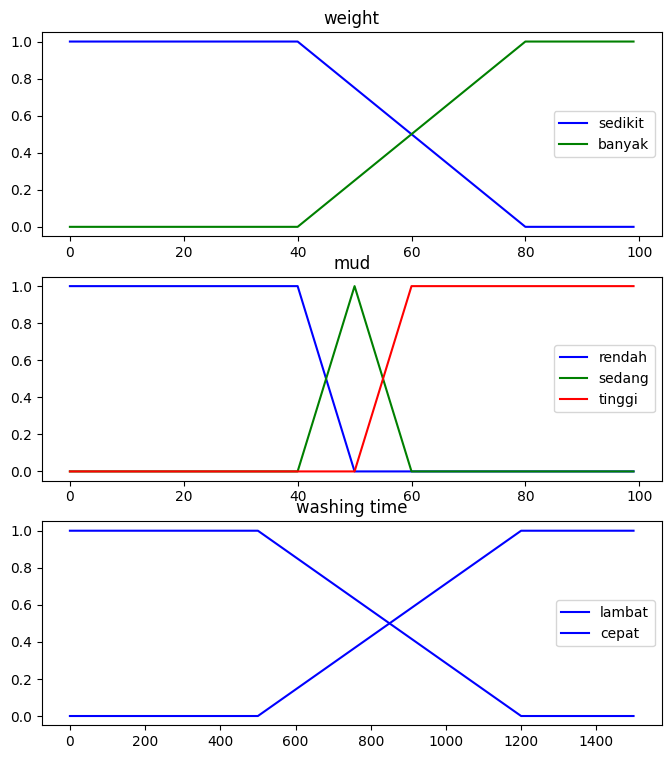

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8,9))
ax0.plot(x_weight, weight_sedikit, 'b', linewidth=1.5, label='sedikit')
ax0.plot(x_weight, weight_banyak, 'g', linewidth=1.5, label='banyak')
ax0.set_title('weight')
ax0.legend()

ax1.plot(x_mud, mud_rendah, 'b', linewidth=1.5, label='rendah')
ax1.plot(x_mud, mud_sedang, 'g', linewidth=1.5, label='sedang')
ax1.plot(x_mud, mud_tinggi, 'r', linewidth=1.5, label='tinggi')
ax1.set_title('mud')
ax1.legend()

ax2.plot(x_wash, wash_lambat, 'b', linewidth=1.5, label='lambat')
ax2.plot(x_wash, wash_cepat, 'b', linewidth=1.5, label='cepat')
ax2.set_title('washing time')
ax2.legend()


In [ ]:
# fuzzification
weight_level_sedikit = fuzz.interp_membership(x_weight, weight_sedikit, 50)
weight_level_banyak = fuzz.interp_membership(x_weight, weight_banyak, 50)

mud_level_rendah = fuzz.interp_membership(x_mud, mud_rendah, 58)
mud_level_sedang = fuzz.interp_membership(x_mud, mud_sedang, 58)
mud_level_tinggi = fuzz.interp_membership(x_mud, mud_tinggi, 58)

print(weight_level_sedikit, weight_level_banyak)
print(mud_level_rendah, mud_level_sedang, mud_level_tinggi)

0.75 0.25
0.0 0.2 0.8


In [ ]:
# lambat
active_rule1 = np.fmin(weight_level_sedikit, mud_level_rendah)
# lambat
active_rule2 = np.fmin(weight_level_sedikit, mud_level_sedang)
# cepat
active_rule3 = np.fmin(weight_level_sedikit, mud_level_tinggi)
# lambat
active_rule4 = np.fmin(weight_level_banyak, mud_level_rendah)
# cepat
active_rule5 = np.fmin(weight_level_banyak, mud_level_sedang)
# cepat
active_rule6 = np.fmin(weight_level_banyak, mud_level_tinggi)

print(active_rule1, active_rule2, active_rule3, active_rule4, active_rule5, active_rule6)

# -----------------------------------------------------------------------------------------------
wash_activation_r1 = np.fmin(active_rule1, wash_lambat)
wash_activation_r2 = np.fmin(active_rule2, wash_lambat)
wash_activation_r3 = np.fmin(active_rule3, wash_cepat)
wash_activation_r4 = np.fmin(active_rule4, wash_lambat)
wash_activation_r5 = np.fmin(active_rule5, wash_cepat)
wash_activation_r6 = np.fmin(active_rule6, wash_cepat)

wash0 = np.zeros_like(x_wash)

0.0 0.2 0.75 0.0 0.2 0.25


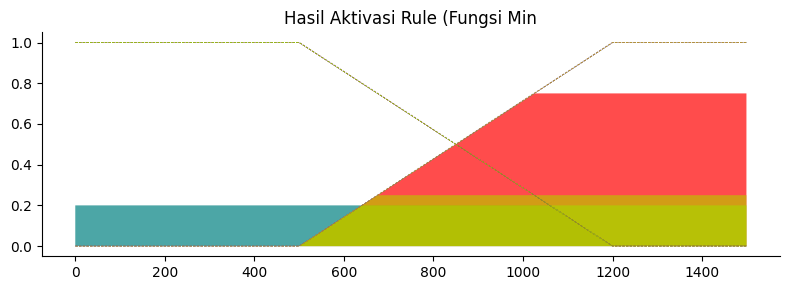

In [ ]:
fig, ax0= plt.subplots(figsize=(8,3))
ax0.fill_between(x_wash, wash0, wash_activation_r1, facecolor='b', alpha=0.7)
ax0.plot(x_wash, wash_lambat, 'b', linewidth=0.5, linestyle='--')
ax0.fill_between(x_wash, wash0, wash_activation_r2, facecolor='teal', alpha=0.7)
ax0.plot(x_wash, wash_cepat, 'teal', linewidth=0.5, linestyle='--')
ax0.fill_between(x_wash, wash0, wash_activation_r3, facecolor='r', alpha=0.7)
ax0.plot(x_wash, wash_lambat, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_wash, wash0, wash_activation_r4, facecolor='m', alpha=0.7)
ax0.plot(x_wash, wash_cepat, 'm', linewidth=0.5, linestyle='--')
ax0.fill_between(x_wash, wash0, wash_activation_r5, facecolor='chartreuse', alpha=0.7)
ax0.plot(x_wash, wash_lambat, 'chartreuse', linewidth=0.5, linestyle='--')
ax0.fill_between(x_wash, wash0, wash_activation_r6, facecolor='y', alpha=0.7)
ax0.plot(x_wash, wash_cepat, 'y', linewidth=0.5, linestyle='--')
ax0.set_title("Hasil Aktivasi Rule (Fungsi Min")

# tambahan
for ax in (ax0, ) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom
    ax.get_yaxis().tick_left
plt.tight_layout()

In [ ]:
aggregated = np.fmax(wash_activation_r1,
                np.fmax(wash_activation_r2,
                    np.fmax(wash_activation_r3,
                        np.fmax(wash_activation_r4,
                            np.fmax(wash_activation_r5, wash_activation_r6)))))

wash = fuzz.defuzz(x_wash, aggregated, 'lom')
wash_activation = fuzz.interp_membership(x_wash, aggregated, wash)

print("wash",wash)

wash 1499


Text(0.5, 1.0, 'Aggregated membership and result (line)')

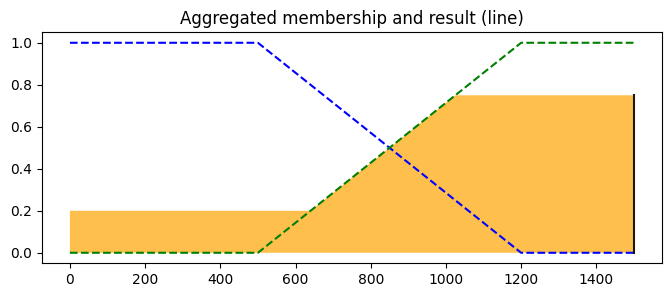

In [ ]:
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.plot(x_wash, wash_lambat, 'b', linewidth=1.5, linestyle='--')
ax0.plot(x_wash, wash_cepat, 'g', linewidth=1.5, linestyle='--')

ax0.fill_between(x_wash, wash0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([wash,wash], [0, wash_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title("Aggregated membership and result (line)")